In [59]:
import pmdarima as pm
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import TimeSeriesSplit
import pandas as pd
import numpy as np
import datetime
import requests
import warnings

import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates

from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA
from sklearn.preprocessing import StandardScaler
# from fbprophet import Prophet
# from fbprophet.plot import plot_plotly, add_changepoints_to_plot
# from keras.models import Sequential
# from keras.layers import Dense

# from keras.optimizers import Adam

warnings.filterwarnings('ignore')

In [60]:
czech  = pd.read_csv('univariate_models/univariate_df_Czechia.csv')
eston  = pd.read_csv('univariate_models/univariate_df_Estonia.csv')
franc  = pd.read_csv('univariate_models/univariate_df_France.csv')
malay  = pd.read_csv('univariate_models/univariate_df_Malaysia.csv')
belgi  = pd.read_csv('univariate_models/univariate_df_Belgium.csv')
chile  = pd.read_csv('univariate_models/univariate_df_Chile.csv')
irela  = pd.read_csv('univariate_models/univariate_df_Ireland.csv')
israe  = pd.read_csv('univariate_models/univariate_df_Israel.csv')
italy  = pd.read_csv('univariate_models/univariate_df_Italy.csv')
us  = pd.read_csv('univariate_models/univariate_df_United_States.csv')

# setting index to the date time value 
for c in [czech, eston, franc, malay,belgi, chile, irela, israe, italy, us]:
    c['date'] = pd.to_datetime(c['date'])

#only certain columns
czech= czech.set_index('date')
eston =eston.set_index('date')
franc =franc.set_index('date')
malay = malay.set_index('date')
belgi = belgi.set_index('date')
chile =chile.set_index('date')
irela = irela.set_index('date')
isrea = israe.set_index('date')
italy = italy.set_index('date')
us = us.set_index('date')

  

In [61]:
#sort index
for x in [czech, eston, franc, malay,belgi, chile, irela, israe, italy, us]:
    x = x.sort_index()
train_size = int(len(czech) * 0.8)
czech_train, czech_test = czech[0:train_size]['new_deaths'], czech[train_size:]['new_deaths']
eston_train, eston_test = eston[0:train_size]['new_deaths'], eston[train_size:]['new_deaths']
franc_train, franc_test = franc[0:train_size]['new_deaths'], franc[train_size:]['new_deaths']
malay_train, malay_test = malay[0:train_size]['new_deaths'], malay[train_size:]['new_deaths']
belgi_train, belgi_test = belgi[0:train_size]['new_deaths'], belgi[train_size:]['new_deaths']
chile_train, chile_test = chile[0:train_size]['new_deaths'], chile[train_size:]['new_deaths']
irela_train, irela_test = irela[0:train_size]['new_deaths'], irela[train_size:]['new_deaths']
israe_train, israe_test = israe[0:train_size]['new_deaths'], israe[train_size:]['new_deaths']
italy_train, italy_test = italy[0:train_size]['new_deaths'], italy[train_size:]['new_deaths']
us_train, us_test = us[0:train_size]['new_deaths'], us[train_size:]['new_deaths']
us_test

date
2023-04-02    1746.0
2023-04-09    1729.0
2023-04-16    1290.0
2023-04-23    1198.0
2023-04-30    1046.0
2023-05-07    1146.0
2023-05-14    1943.0
2023-05-21     755.0
2023-05-28     738.0
2023-06-04     689.0
2023-06-11     631.0
2023-06-18     609.0
2023-06-25     576.0
2023-07-02     540.0
2023-07-09     487.0
2023-07-16     507.0
2023-07-23     535.0
2023-07-30     545.0
2023-08-06     670.0
2023-08-13     749.0
2023-08-20     915.0
2023-08-27    1052.0
2023-09-03    1181.0
2023-09-10    1301.0
2023-09-17    1396.0
2023-09-24    1402.0
2023-10-01    1437.0
2023-10-08    1374.0
2023-10-15    1291.0
2023-10-22    1355.0
2023-10-29    1270.0
2023-11-05    1218.0
2023-11-12    1353.0
2023-11-19    1380.0
2023-11-26    1356.0
2023-12-03    1605.0
2023-12-10    1614.0
2023-12-17    1450.0
2023-12-24    1263.0
2023-12-31     839.0
2024-01-07       0.0
Name: new_deaths, dtype: float64

In [62]:
print(czech_train.dtypes)

float64


In [63]:
from pmdarima import auto_arima
model = auto_arima(czech_train, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, 
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.77 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1889.088, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1767.191, Time=0.15 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.47 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1802.154, Time=0.06 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1736.937, Time=0.61 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.65 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.67 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1820.733, Time=0.41 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1728.320, Time=1.12 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=1755.813, Time=0.40 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=3.31 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=0.60 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=1728.577, Time=0.72 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=1726.8

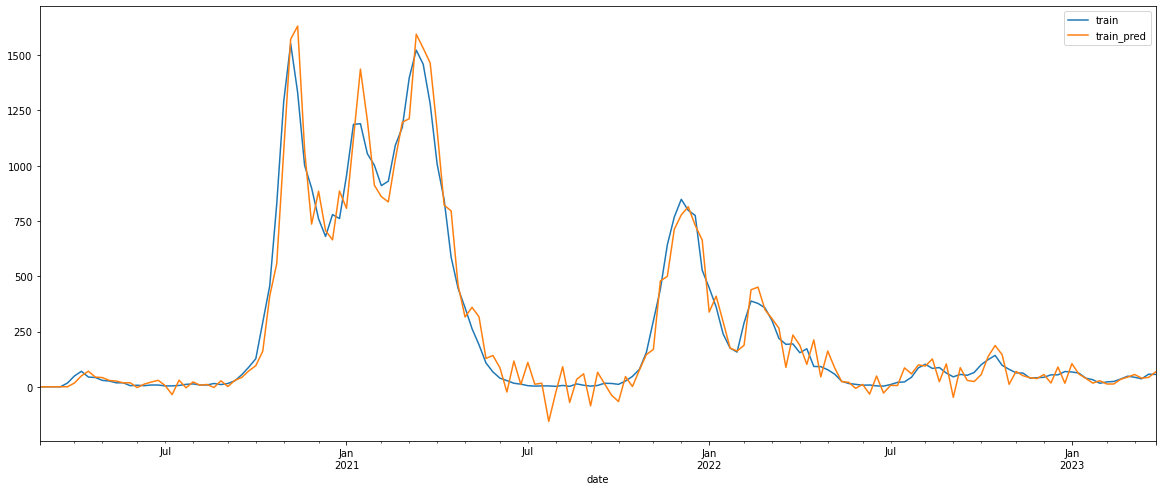

In [64]:
train_pred=model.fittedvalues()
pd.concat([czech_train, train_pred], axis=1).plot(figsize=(20,8))
plt.legend(['train', 'train_pred'])

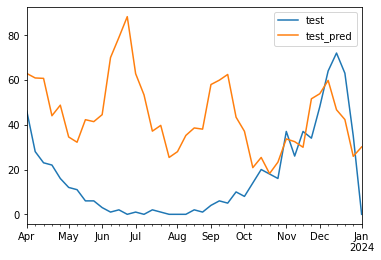

In [65]:
test_pred=model.predict(n_periods=len(czech_test))
pd.concat([czech_test, test_pred], axis=1).plot()

plt.legend(['test', 'test_pred'])

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.58 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1332.619, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1249.038, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.45 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1277.156, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1243.204, Time=0.30 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=3.69 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.58 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1298.995, Time=0.15 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1241.792, Time=0.56 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=1249.444, Time=0.69 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=4.25 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=0.50 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=1243.611, Time=0.66 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=1243.7

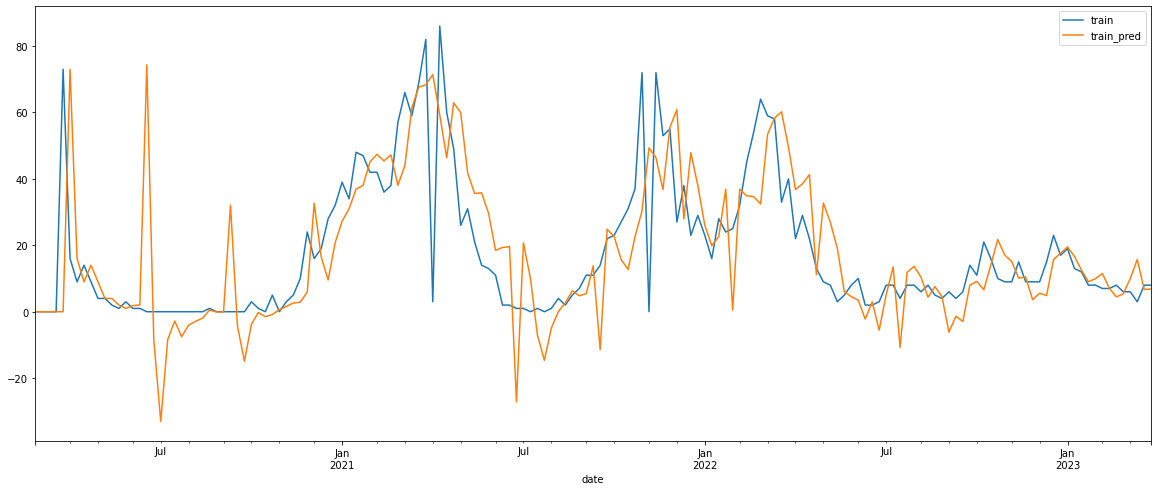

In [66]:
from pmdarima import auto_arima
model = auto_arima(eston_train, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, 
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(model.aic())
train_pred=model.fittedvalues()
pd.concat([eston_train, train_pred], axis=1).plot(figsize=(20,8))
plt.legend(['train', 'train_pred'])

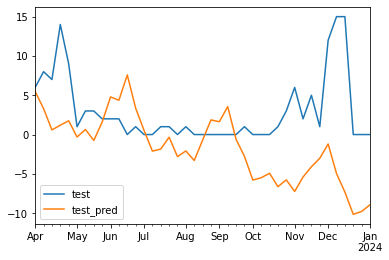

In [67]:
test_pred=model.predict(n_periods=len(czech_test))
pd.concat([eston_test, test_pred], axis=1).plot()

plt.legend(['test', 'test_pred'])

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.44 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2205.939, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=2069.758, Time=0.19 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.50 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=2107.833, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=2062.866, Time=0.74 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=4.36 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.50 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=2174.584, Time=0.41 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=2045.689, Time=1.12 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=2060.901, Time=0.31 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=3.55 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=0.62 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=2037.456, Time=0.93 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=2057.0

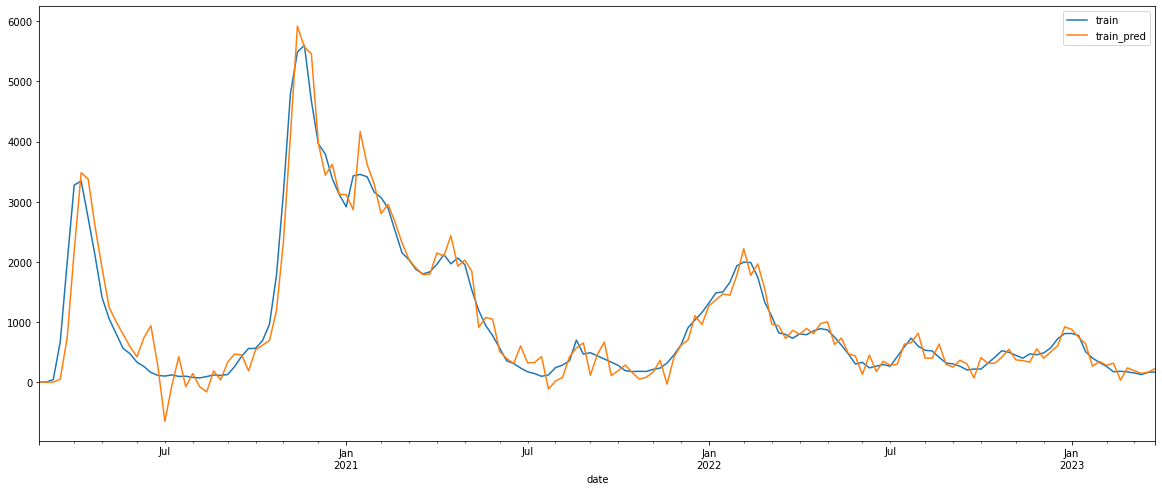

In [68]:
from pmdarima import auto_arima
model = auto_arima(franc_train, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, 
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(model.aic())
train_pred=model.fittedvalues()
pd.concat([franc_train, train_pred], axis=1).plot(figsize=(20,8))
plt.legend(['train', 'train_pred'])


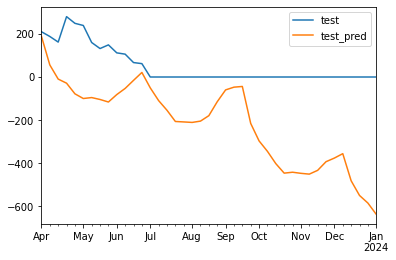

In [69]:
test_pred=model.predict(n_periods=len(czech_test))
pd.concat([franc_test, test_pred], axis=1).plot()

plt.legend(['test', 'test_pred'])

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.42 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1967.202, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1850.794, Time=0.15 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.60 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1900.575, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1843.091, Time=0.47 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.49 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.48 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1907.449, Time=0.29 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1838.549, Time=0.83 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=1845.301, Time=0.27 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=3.17 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=0.62 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=1837.361, Time=0.89 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=1844.8

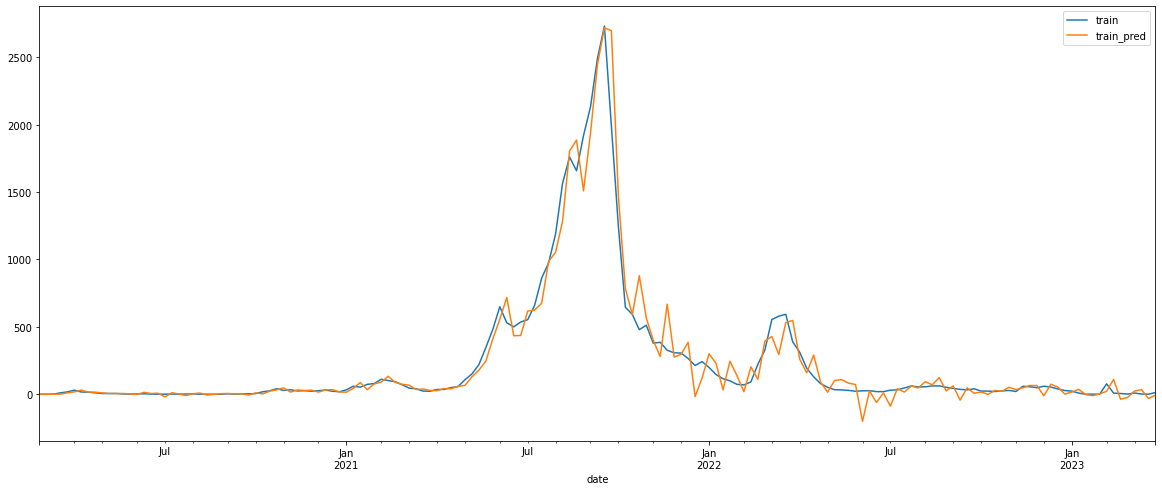

In [70]:
model = auto_arima(malay_train, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, 
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(model.aic())
train_pred=model.fittedvalues()
pd.concat([malay_train, train_pred], axis=1).plot(figsize=(20,8))
plt.legend(['train', 'train_pred'])

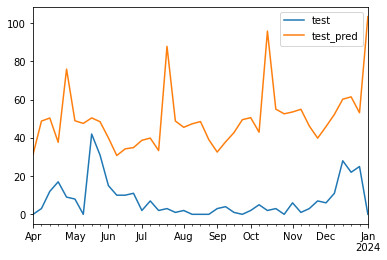

In [71]:
test_pred=model.predict(n_periods=len(czech_test))
pd.concat([malay_test, test_pred], axis=1).plot()

plt.legend(['test', 'test_pred'])

In [72]:
model = auto_arima(belgi_train, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, 
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(model.aic())


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1745.721, Time=0.40 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1910.789, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1801.642, Time=0.16 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.58 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1791.577, Time=0.08 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=1747.212, Time=0.93 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=1747.043, Time=3.91 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=1769.613, Time=0.29 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=inf, Time=4.46 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=1785.430, Time=0.46 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=inf, Time=1.35 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=1738.565, Time=0.77 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1785.208, Time=0.16 sec
 ARIMA(1,1,2)(1,1,1)[12]             : AIC=1740.353, Time=0.89 sec
 ARIMA(1,1,2)(0,1,2)[12]          

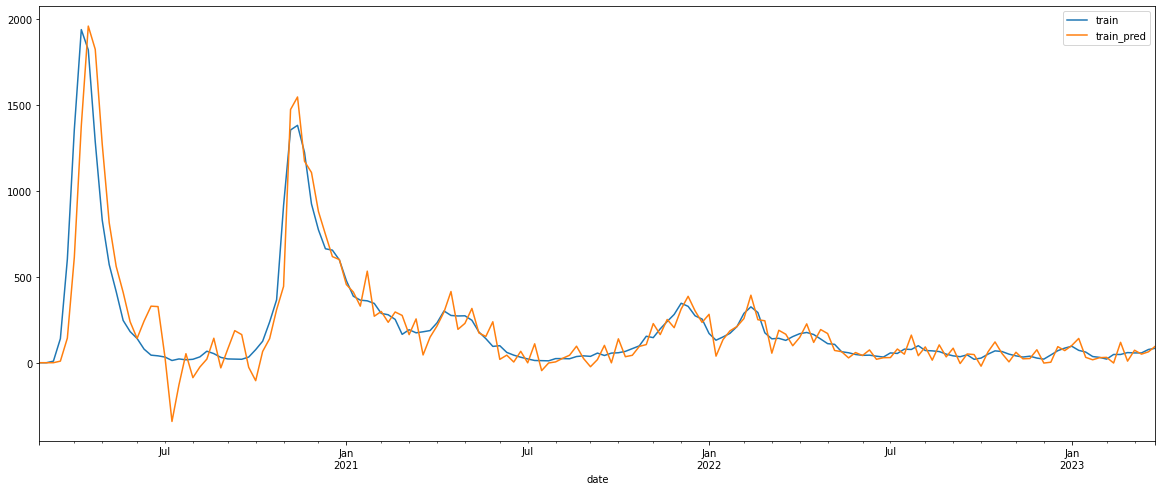

In [73]:
train_pred=model.fittedvalues()
pd.concat([belgi_train, train_pred], axis=1).plot(figsize=(20,8))
plt.legend(['train', 'train_pred'])

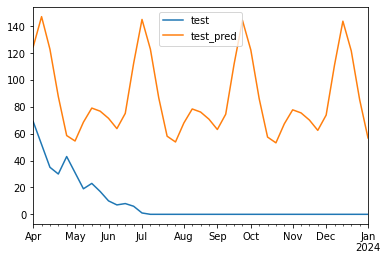

In [74]:
test_pred=model.predict(n_periods=len(czech_test))
pd.concat([belgi_test, test_pred], axis=1).plot()

plt.legend(['test', 'test_pred'])

In [75]:
model = auto_arima(chile_train, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, 
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.65 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2653.163, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=2572.930, Time=0.31 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.39 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=2612.662, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=2559.117, Time=1.18 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=4.30 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.84 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=2601.341, Time=0.30 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=2544.756, Time=2.37 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=2558.760, Time=0.58 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=4.08 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=1.05 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=2538.565, Time=2.59 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=2552.9

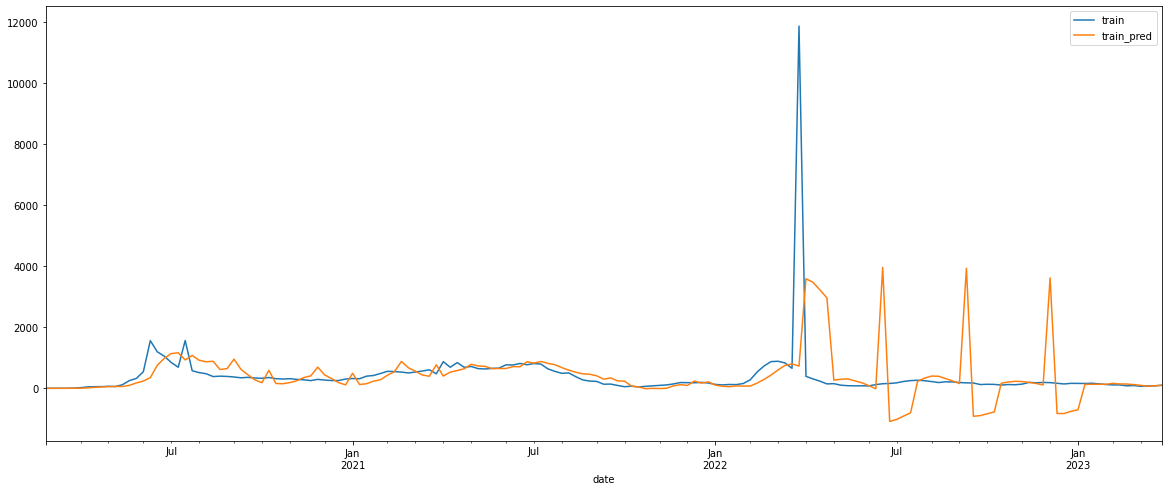

In [76]:
train_pred=model.fittedvalues()
pd.concat([chile_train, train_pred], axis=1).plot(figsize=(20,8))
plt.legend(['train', 'train_pred'])

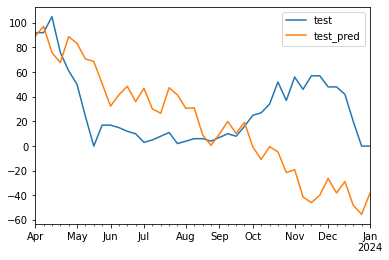

In [77]:
test_pred=model.predict(n_periods=len(czech_test))
pd.concat([chile_test, test_pred], axis=1).plot()

plt.legend(['test', 'test_pred'])

In [78]:
model = auto_arima(irela_train, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, 
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.48 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1524.967, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1438.092, Time=0.12 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.53 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1468.109, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1430.065, Time=0.51 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=4.46 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.71 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1497.429, Time=0.25 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1421.014, Time=0.70 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=1432.858, Time=0.29 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=1409.620, Time=5.74 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=1.02 sec
 ARIMA(2,1,0)(2,1,2)[12]             : AIC=inf, Time=6.53 sec
 ARIMA(2,1,0)(1,1,2)[12]             : AIC=inf, T

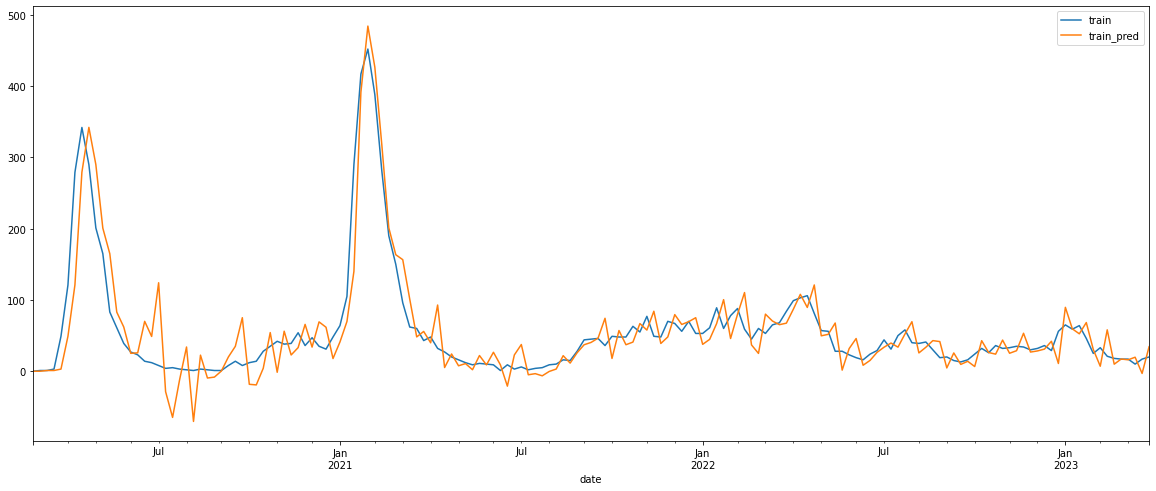

In [79]:
train_pred=model.fittedvalues()
pd.concat([irela_train, train_pred], axis=1).plot(figsize=(20,8))
plt.legend(['train', 'train_pred'])

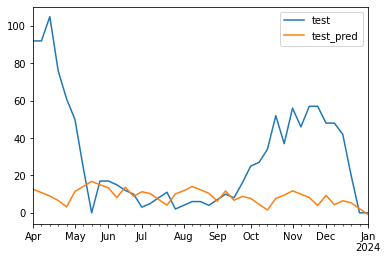

In [80]:
test_pred=model.predict(n_periods=len(czech_test))
pd.concat([chile_test, test_pred], axis=1).plot()

plt.legend(['test', 'test_pred'])

In [81]:
model = auto_arima(israe_train, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, 
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.71 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1574.053, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1442.549, Time=0.24 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.93 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1493.747, Time=0.07 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1433.055, Time=1.01 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.98 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.40 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1501.845, Time=0.28 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1432.989, Time=0.87 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=1442.152, Time=0.26 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=2.91 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=0.65 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=1430.329, Time=1.48 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=1440.4

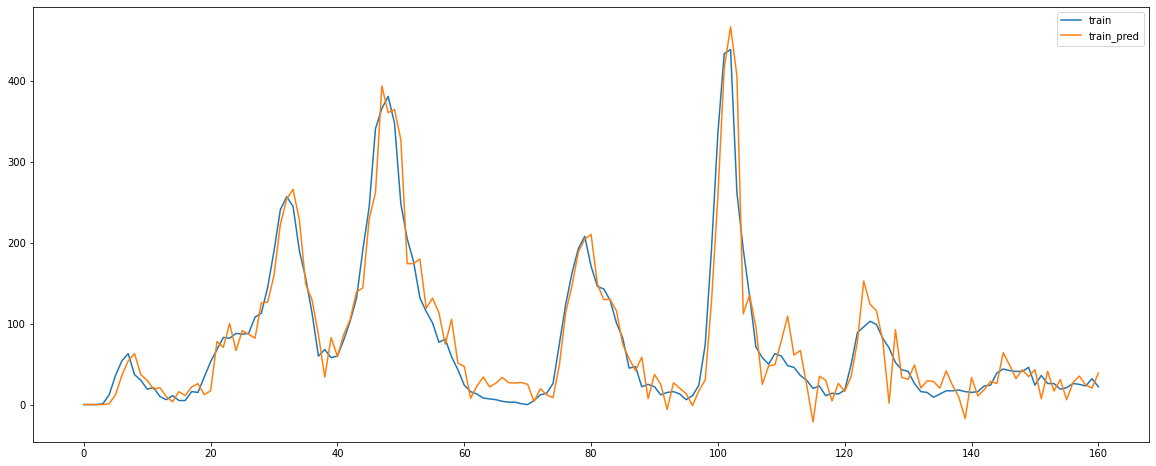

In [82]:
train_pred=model.fittedvalues()
pd.concat([israe_train, train_pred], axis=1).plot(figsize=(20,8))
plt.legend(['train', 'train_pred'])

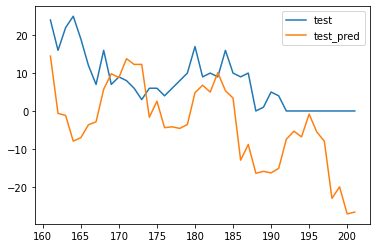

In [83]:
test_pred=model.predict(n_periods=len(czech_test))
pd.concat([israe_test, test_pred], axis=1).plot()

plt.legend(['test', 'test_pred'])

In [84]:
model = auto_arima(italy_train, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, 
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.50 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2262.621, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=2148.442, Time=0.18 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.39 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=2175.186, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=2140.220, Time=0.74 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.81 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.63 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=2207.897, Time=0.51 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=2142.040, Time=1.01 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=2142.103, Time=1.04 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=2162.565, Time=0.89 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=2143.796, Time=3.24 sec
 ARIMA(1,1,0)(2,1,0)[12] intercept   : AIC=2142.206, Time=3.22 sec

Best model:  ARIMA(1,1,0)(2,1,0)[12]  

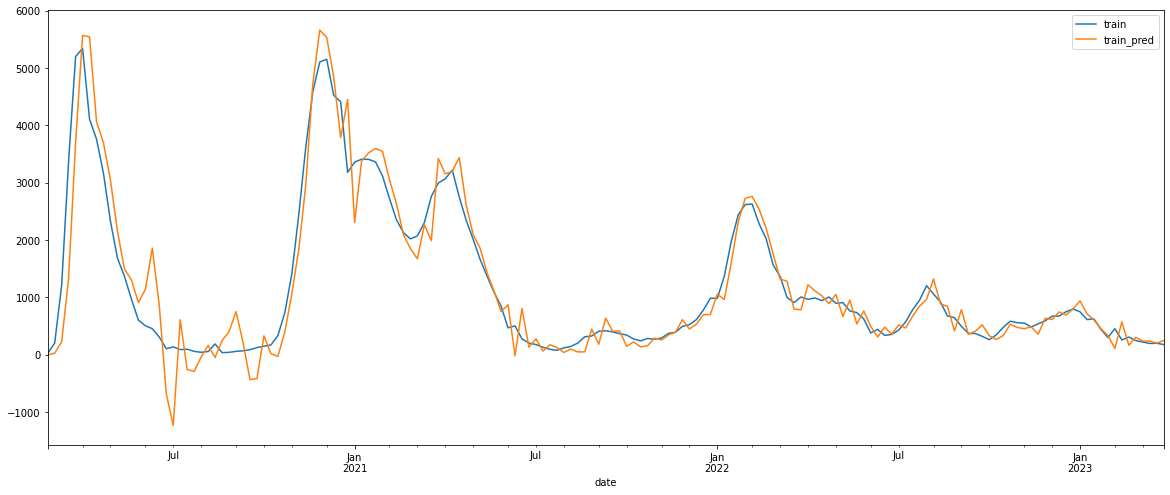

In [85]:
train_pred=model.fittedvalues()
pd.concat([italy_train, train_pred], axis=1).plot(figsize=(20,8))
plt.legend(['train', 'train_pred'])

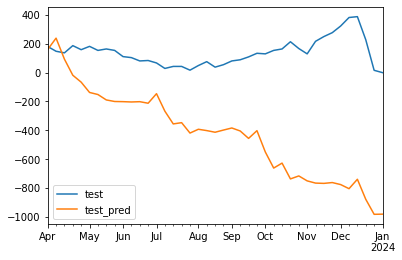

In [86]:
test_pred=model.predict(n_periods=len(czech_test))
pd.concat([italy_test, test_pred], axis=1).plot()

plt.legend(['test', 'test_pred'])

In [87]:
model = auto_arima(us_train, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, 
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.83 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2708.335, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=2638.494, Time=0.34 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.53 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=2688.701, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=2604.627, Time=2.13 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=3.11 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.58 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=2611.876, Time=0.30 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=2583.836, Time=3.15 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=2610.591, Time=0.54 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=5.43 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=0.66 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=2585.775, Time=3.14 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=2585.7

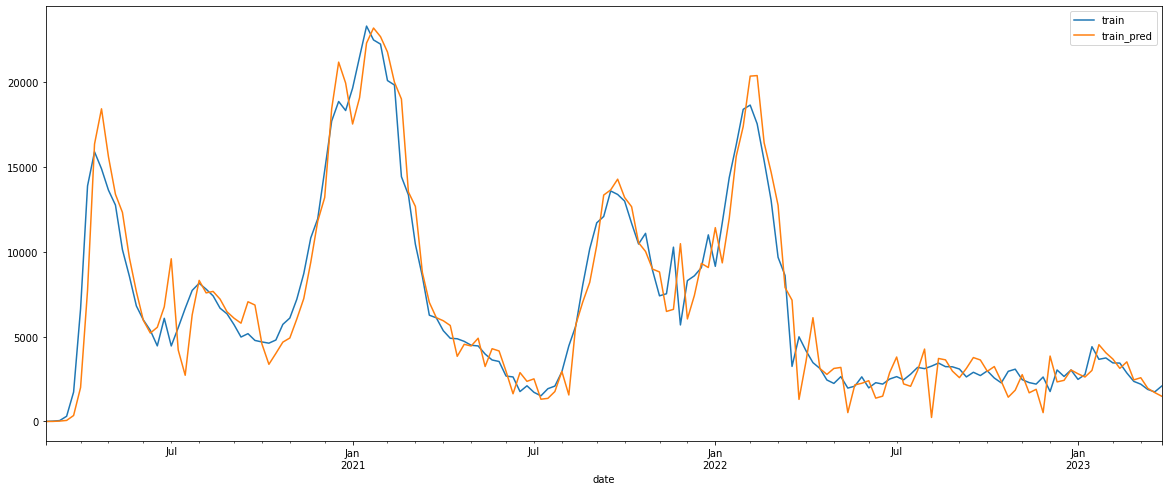

In [88]:
train_pred=model.fittedvalues()
pd.concat([us_train, train_pred], axis=1).plot(figsize=(20,8))
plt.legend(['train', 'train_pred'])

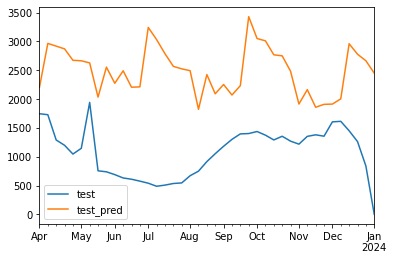

In [89]:
test_pred=model.predict(n_periods=len(czech_test))
pd.concat([us_test, test_pred], axis=1).plot()

plt.legend(['test', 'test_pred'])